In [63]:
import pandas as pd
from plotnine import *
import numpy as np


# Ex. 1)
- Da coleção de ilusões ópticas do Museu Americano de História Natural [2], identifique duas ilusões ópticas que você considera mais promissoras em termos de potencial para aprimorar a visualização de dados. Justifique sua escolha.

**RESPOSTA:**

A primeira ilusão que considero promissora é a chamada "filling-in" (conforme apresentado no link abaixo). Escolhi essa ilusão porque ela tem um grande potencial para reduzir a sobrecarga visual e os ruídos em visualizações de dados. Como o cérebro preenche lacunas nas imagens, essa característica pode ser aproveitada para criar designs mais limpos e eficazes, alinhados com os princípios de Edward Tufte. Além disso, essa ilusão pode ser utilizada para guiar o leitor a perceber correlações e tendências nos dados, através de designs que induzem a percepção de formas ou padrões implícitos.
- [Filling-in](https://www.amnh.org/explore/ology/brain/optical-illusions-and-how-they-work/filling-in)

A segunda ilusão que escolhi é a "priming" (link abaixo). Acredito que essa ilusão tem um grande potencial para direcionar a interpretação dos dados. Por exemplo, ao destacar um determinado padrão em uma visualização antes de apresentar gráficos mais complexos, é possível preparar o leitor para identificar esse padrão com mais facilidade nas visualizações subsequentes.
- [Priming](https://www.amnh.org/explore/ology/brain/optical-illusions-and-how-they-work/priming)

---

# Ex. 2)
- Nas Seções 11.1 a 11.12 em [39], o estatístico Rafael A. Irizarry destaca 11 conjuntos de problemas que podem aparecer nos gráficos gerados pela biblioteca ggplot2 (R)/plotnine (Python) e discute, quando pertinentes, soluções em R para contorná-los. Porte essas soluções em R para Python.

## 11.4)

In [64]:
# Importando o dataset murders

# URL do dataset murders no GitHub do dslabs
url = "https://raw.githubusercontent.com/rafalab/dslabs/master/inst/extdata/murders.csv"

# Lendo o dataset em um DataFrame do pandas
df_murders = pd.read_csv(url)

df_murders.head()



,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257


In [65]:
# Código original em R

# data(murders)
# murders |> mutate(murder_rate = total / population * 100000) |>
#   mutate(state = reorder(state, murder_rate)) |>
#   ggplot(aes(state, murder_rate)) +
#   geom_bar(stat="identity") +
#   coord_flip() +
#   theme(axis.text.y = element_text(size = 6)) +
#   xlab("")

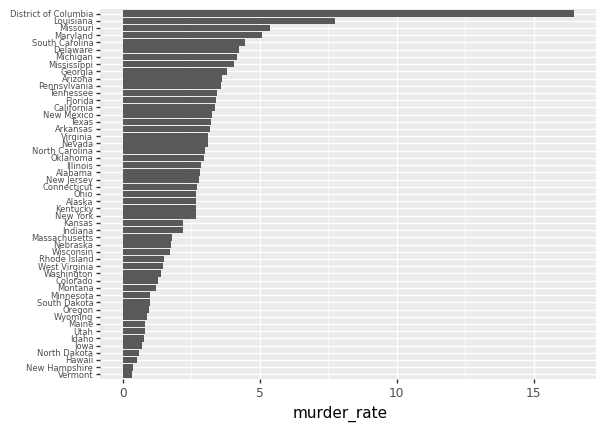

{<ggplot: (687835661)>}

In [66]:
# Código convertido para python

def calc_murder_rate(df):
    df['murder_rate'] = df['total'] / df['population'] * 100000.0
    return df

def reorder_df(df):
    df = df.sort_values(by='murder_rate', ascending=False)
    df['state'] = pd.Categorical(df['state'], categories=df['state'], ordered=True)
    return df

df = (df_murders
      .pipe(calc_murder_rate)
      .pipe(reorder_df))

{
    ggplot(df) + aes(x='reorder(state, murder_rate)', y ='murder_rate') + \
    geom_bar(stat='identity') + \
    coord_flip() + \
    theme(axis_text_y=element_text(size=6)) + \
    xlab("")
}

## 11.5)

In [67]:
# Importando o dataset murders

# URL do dataset murders no GitHub do dslabs
path = "https://vincentarelbundock.github.io/Rdatasets/csv/dslabs/heights.csv"

# Lendo o dataset em um DataFrame do pandas
df_heights = pd.read_csv(path)

display(df_heights.head())

,rownames,sex,height
0,1,Male,75.0
1,2,Male,70.0
2,3,Male,68.0
3,4,Male,74.0
4,5,Male,61.0


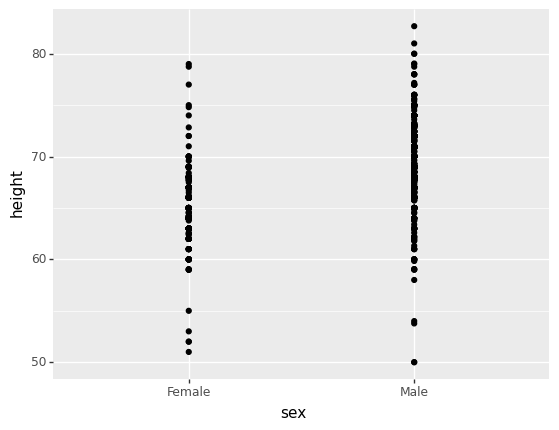

{<ggplot: (352451027)>}

In [68]:
{
    ggplot(df_heights) + aes(x='sex', y ='height') + \
    geom_point()

}

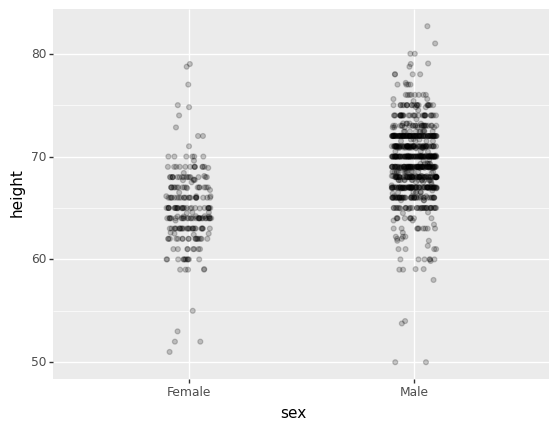

{<ggplot: (352512250)>}

In [69]:
{
    ggplot(df_heights) + aes(x='sex', y ='height') + \
    geom_jitter(width = 0.1, alpha = 0.2) 

}

## 11.6)

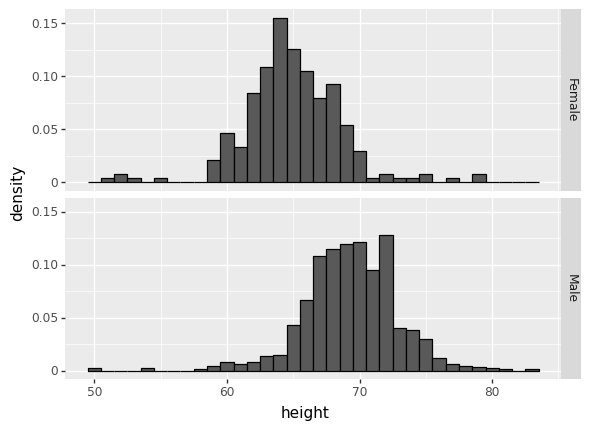

{<ggplot: (352553469)>}

In [70]:
{
    ggplot(df_heights) + aes(x='height', y ='..density..') + \
    geom_histogram(binwidth=1, color="black") + \
    facet_grid('sex ~ .')

}

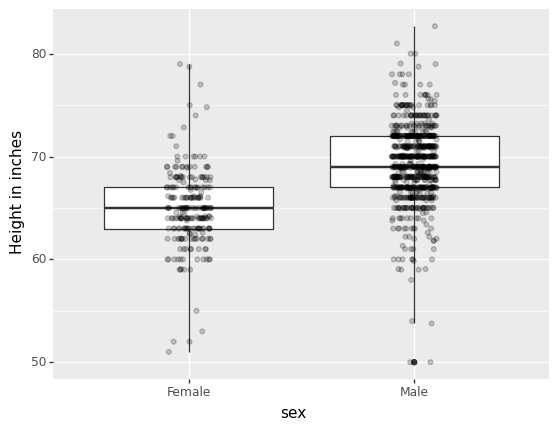

{<ggplot: (687841311)>}

In [71]:
{
    ggplot(df_heights) + aes(x='sex', y ='height') + \
    geom_boxplot(coef=3) + \
    geom_jitter(width = 0.1, alpha = 0.2) + \
    ylab("Height in inches")
}

## 11.8)

In [72]:
# Importando o dataset murders

# URL do dataset murders no GitHub do dslabs
path = "https://vincentarelbundock.github.io/Rdatasets/csv/dslabs/us_contagious_diseases.csv"

# Lendo o dataset em um DataFrame do pandas
df_diseases = pd.read_csv(path)

display(df_diseases.head())

,rownames,disease,state,year,weeks_reporting,count,population
0,1,Hepatitis A,Alabama,1966,50,321,3345787.0
1,2,Hepatitis A,Alabama,1967,49,291,3364130.0
2,3,Hepatitis A,Alabama,1968,52,314,3386068.0
3,4,Hepatitis A,Alabama,1969,49,380,3412450.0
4,5,Hepatitis A,Alabama,1970,51,413,3444165.0


In [73]:
# Importando o dataset murders

# URL do dataset murders no GitHub do dslabs
path = "https://vincentarelbundock.github.io/Rdatasets/csv/dslabs/gapminder.csv"

# Lendo o dataset em um DataFrame do pandas
df_gapminder = pd.read_csv(path)

west = ["Western Europe","Northern Europe","Southern Europe",
          "Northern America","Australia and New Zealand"]

def filter_west(df):
    return df[df['region'].isin(west)]

def filter_gapminder(df):
    df_filtered = df.copy(deep=True)
    df_filtered = df_filtered.loc[
        (df_filtered['year'].isin([2010, 2015])) &
        (df_filtered['region'].isin(west)) &
        (~pd.isna(df_filtered['life_expectancy'])) &
        (df_filtered['population'] > 10**7)
    ]

    return df_filtered

df_gapminder = df_gapminder.pipe(filter_gapminder)

display(df_gapminder.head())
print(df_gapminder.shape)

,rownames,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
9257,9258,Australia,2010,4.1,82.0,1.89,22162863.0,5.630494e+11,Oceania,Australia and New Zealand
9265,9266,Belgium,2010,3.6,80.1,1.84,10929978.0,2.671431e+11,Europe,Western Europe
9279,9280,Canada,2010,4.9,81.3,1.63,34126173.0,8.727845e+11,Americas,Northern America
9307,9308,France,2010,3.5,81.4,1.98,62961136.0,1.481000e+12,Europe,Western Europe
9312,9313,Germany,2010,3.5,80.3,1.39,80435307.0,2.069464e+12,Europe,Western Europe


(24, 10)


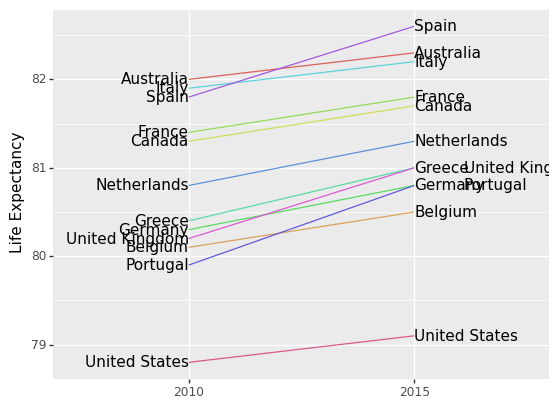

<ggplot: (683322977)>

In [74]:
# Mutate equivalente usando assign
df_gapminder_enriched = (df_gapminder.assign(location=lambda x: x['year'].apply(lambda y: 1 if y == 2010 else 2),
                  hjust=lambda x: x['year'].apply(lambda y: 'right' if y == 2010 else 'left'))
       .assign(location=lambda x: x.apply(lambda row: row['location'] + 0.22 if row['year'] == 2015 and row['country'] in ['United Kingdom', 'Portugal'] else row['location'], axis=1)))

df_gapminder_enriched['year'] = df_gapminder_enriched['year'].astype(str)

# Criando o gráfico com plotnine
(
    ggplot(df_gapminder_enriched, aes(x='year', y='life_expectancy', group='country')) +
        geom_line(aes(color='country'), show_legend=False) +
        geom_text(aes(x='location', label='country', hjust='hjust'), show_legend=False) +
        xlab('') + ylab('Life Expectancy')
)


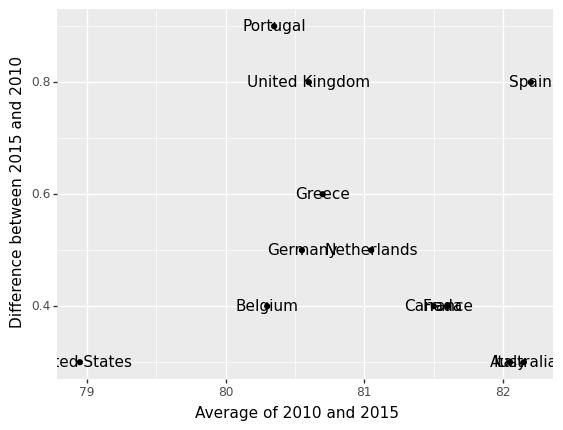

<ggplot: (352719788)>

In [75]:
df_gapminder_enriched_ba = (df_gapminder_enriched.assign(year=lambda x: "life_expectancy_" + x['year'].astype(str))
          .pivot(index='country', columns='year', values='life_expectancy')
          .reset_index())

# Calculando a média e a diferença
df_gapminder_enriched_ba['average'] = (df_gapminder_enriched_ba['life_expectancy_2015'] + df_gapminder_enriched_ba['life_expectancy_2010']) / 2
df_gapminder_enriched_ba['difference'] = df_gapminder_enriched_ba['life_expectancy_2015'] - df_gapminder_enriched_ba['life_expectancy_2010']

# Criando o gráfico
(
        ggplot(df_gapminder_enriched_ba, aes(x='average', y='difference', label='country')) +
        geom_point() +
        geom_text() +  # O plotnine nao tem a funçao geom_text_repel
        geom_abline(linetype='dashed') +
        xlab("Average of 2010 and 2015") + 
        ylab("Difference between 2015 and 2010")
)




---

# Ex. 3)
- Na Seção 11.14 em [39], o estatístico Rafael A. Irizarry explora, sob a perspectiva dos princípiosde percepção e cognição, diferentes abordagens para visualizar os dados relacionados aos casos de sarampo nos estados dos Estados Unidos entre 1928 e 2011, utilizando o conjunto de dados us contagious diseases [53]. O objetivo é demonstrar a efetividade das vacinas na erradicação do
sarampo. Porte as alternativas em R, apresentadas por Irizarry, para Python. Faça uma análise crítica dessas alternativas, considerando a possibilidade de outras abordagens mais eficientes e assertivas para alcançar o objetivo proposto.

In [76]:
# Importando o dataset murders

# URL do dataset murders no GitHub do dslabs
path = "https://vincentarelbundock.github.io/Rdatasets/csv/dslabs/us_contagious_diseases.csv"

# Lendo o dataset em um DataFrame do pandas
df_diseases = pd.read_csv(path)

display(df_diseases.head())

,rownames,disease,state,year,weeks_reporting,count,population
0,1,Hepatitis A,Alabama,1966,50,321,3345787.0
1,2,Hepatitis A,Alabama,1967,49,291,3364130.0
2,3,Hepatitis A,Alabama,1968,52,314,3386068.0
3,4,Hepatitis A,Alabama,1969,49,380,3412450.0
4,5,Hepatitis A,Alabama,1970,51,413,3444165.0


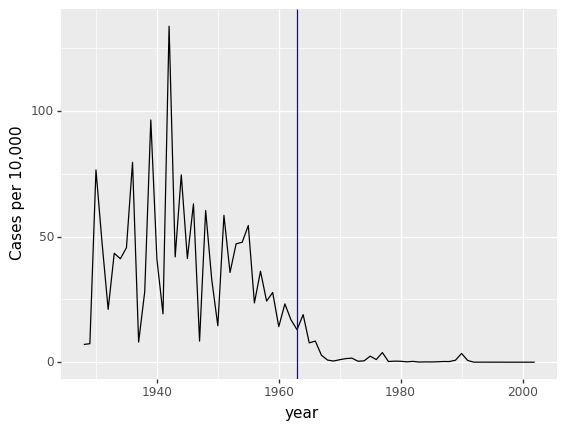

<ggplot: (352535917)>

In [77]:
the_disease = "Measles"

# Filtrando os dados
dat = (
    df_diseases.query("state not in ['Hawaii', 'Alaska'] and disease == @the_disease")
    .assign(rate=lambda x: x['count'] / x['population'] * 10000 * 52 / x['weeks_reporting'])
)

# Calculando a mediana das taxas antes de 1963 para cada estado
median_rates = (
    dat.query("year <= 1963")
    .groupby('state')['rate']
    .median()
    .reset_index()
    .rename(columns={'rate': 'median_rate'})
)

# Unindo os dados originais com as medianas calculadas
dat = pd.merge(dat, median_rates, on='state', how='left')

# Reordenando os estados com base na mediana
dat['state'] = pd.Categorical(dat['state'], categories=median_rates.sort_values('median_rate')['state'], ordered=True)

# Filtrando os dados para o estado da Califórnia
california_data = dat.query("state == 'California' and rate.notna()")

# Criando o gráfico
(
    ggplot(california_data, aes(x='year', y='rate')) +
    geom_line() +
    ylab("Cases per 10,000") +
    geom_vline(xintercept=1963, color="blue")
)


/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/plotnine/scales/scale.py:102: PlotnineWarning: scale_fill_gradientn could not recognise parameter `coord_trans`


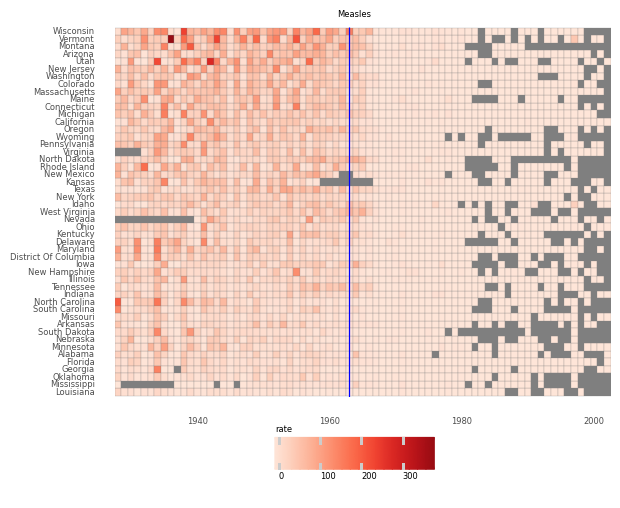

{<ggplot: (687600011)>}

In [78]:
import seaborn as sns
colors = sns.color_palette("Reds", n_colors=9)

{
    ggplot(dat, aes(x='year', y='state', fill='rate')) +
    geom_tile(color='grey') + 
    scale_x_continuous(expand=(0,0)) + 
    scale_fill_gradientn(colors=colors, coord_trans='sqrt') +
    geom_vline(xintercept=1963, color='blue')
    + theme_minimal() +
    theme(
        panel_grid=element_blank(),
        legend_position='bottom',
        text=element_text(size=6)
    )
    + labs(title=the_disease, x="", y="")
}

,year,count_sum,population_sum,us_rate
0,1928,483337,119769502.0,40.355599
1,1929,339061,121352203.0,27.940243
2,1930,384597,122775046.0,31.325340
3,1931,438435,124007135.0,35.355627
4,1932,390114,125066215.0,31.192597


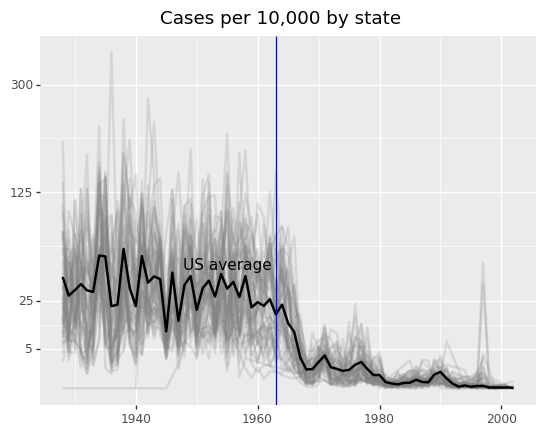

<ggplot: (685601190)>

In [79]:

# Calculando a média dos casos por 10.000 habitantes
avg = (df_diseases
       .query('disease == @the_disease')
       .groupby('year')
       .agg(count_sum=('count', 'sum'), population_sum=('population', 'sum'))
       .reset_index())

avg['us_rate'] = avg['count_sum'] / avg['population_sum'] * 10000

display(avg.head())

# Criando o gráfico
(
ggplot(dat.query('rate.notna()'))
+ geom_line(aes(x='year', y='rate', group='state'), color='grey', show_legend=False, alpha=0.2, size=1)
+ geom_line(aes(x='year', y='us_rate'), data=avg, size=1)
+ scale_y_continuous(trans='sqrt', breaks=[5, 25, 125, 300])
+ ggtitle("Cases per 10,000 by state")
+ xlab("")
+ ylab("")
+ geom_text(data=pd.DataFrame({'x': [1955], 'y': [50], 'label': ["US average"]}),
                mapping=aes(x='x', y='y', label='label'),
                color='black')
+ geom_vline(xintercept=1963, color='blue')
)


## Análise critíca

As visualizações propostas por Irizarry foram muito bem escolhidas, conseguindo evidenciar claramente as o efeito da vacinação na população. 
O segundo gráfico (heatmap) é bem interessante por compilar muitas informações de estados diferentes ao mesmo tempo, porém o uso de cores para representar a incidência de casos acaba trazendo uma limitação, uma vez que seres humanos não são bons em converter tons de cor em quantidades. O último gráfico também é uma ótima visualização mas traz um pouco de sobrecarga visual ao trazer linhas referentes a todos os estados. Ao mesmo tempo, a média total é um dado que traz uma perda de informação. Para este caso, talvez fosse interessante trazer gráficos complementares como o desvio padrão e intervalo interquartil de modo a evidenciar a distribuição dos casos ao longo dos anos.